In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
loan = pd.read_csv("loan.csv",low_memory=False)

# Investigating the shape of the data

In [161]:
len(loan) #number of rows

39717

In [162]:
loan.head() #data at a glance

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [163]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Treating missing values

In [164]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### We're unable to look at all the columns since the number is huge, its better to Visualize missing values to discover which ones need attention

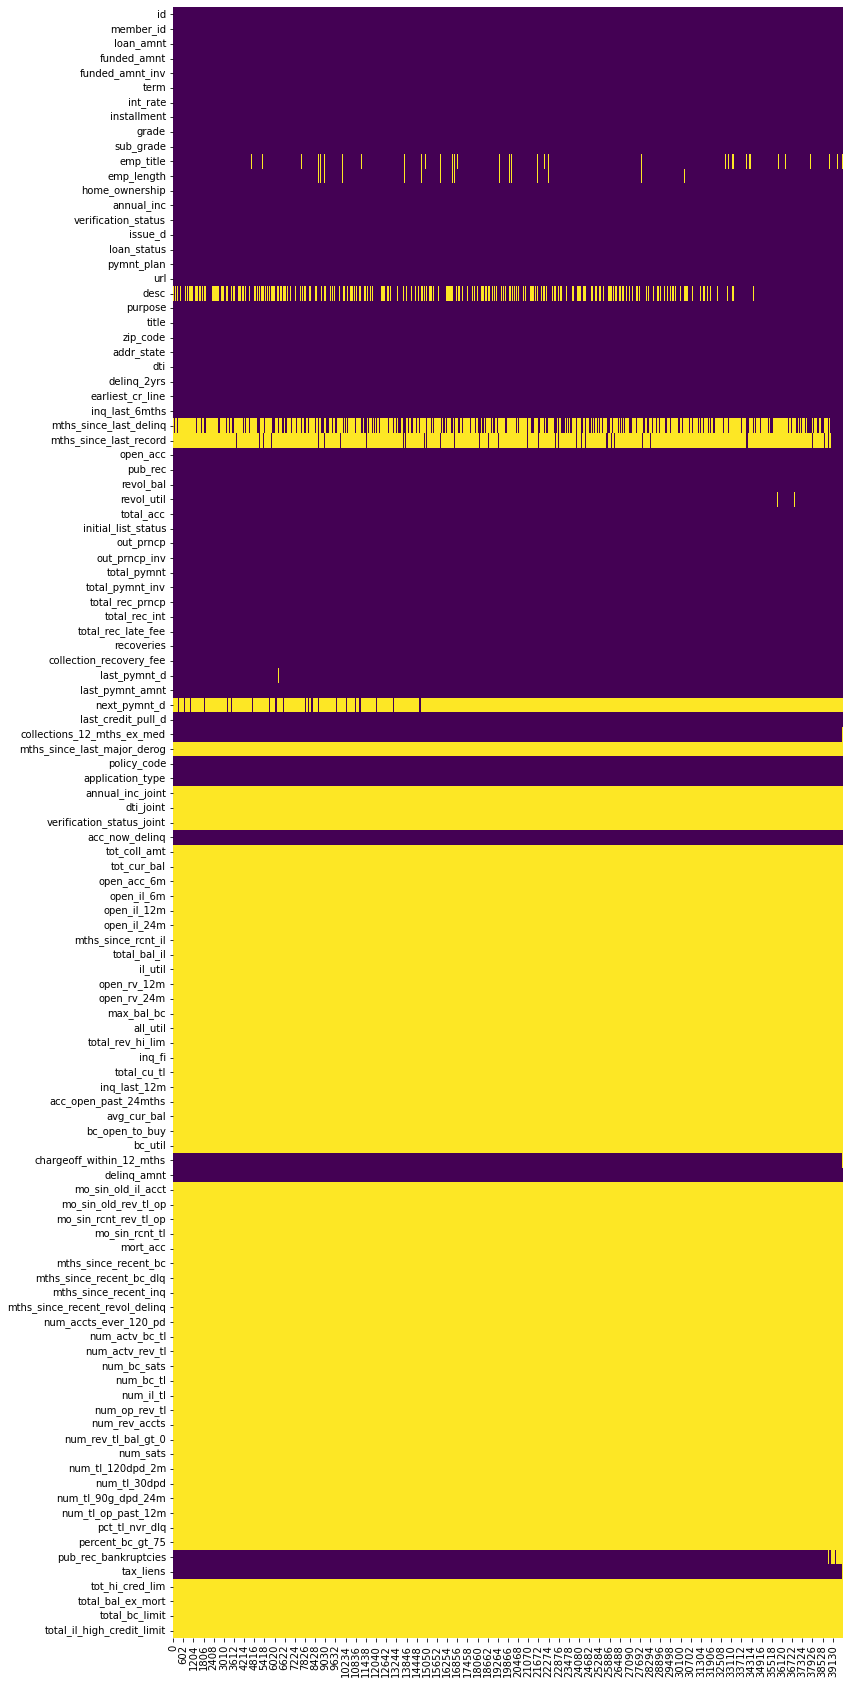

In [165]:
plt.figure(figsize=(12,30))
sns.heatmap(loan.isna().transpose(),
            cmap="viridis",cbar=False)
plt.show()

#### A lot of columns seem to have only missing values, it's ideal to drop those columns altogether with a condition over missing values

In [166]:
loan.dropna(axis=1,how='all',inplace=True) #how='all' will drop any columns that contain only missing values

In [167]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

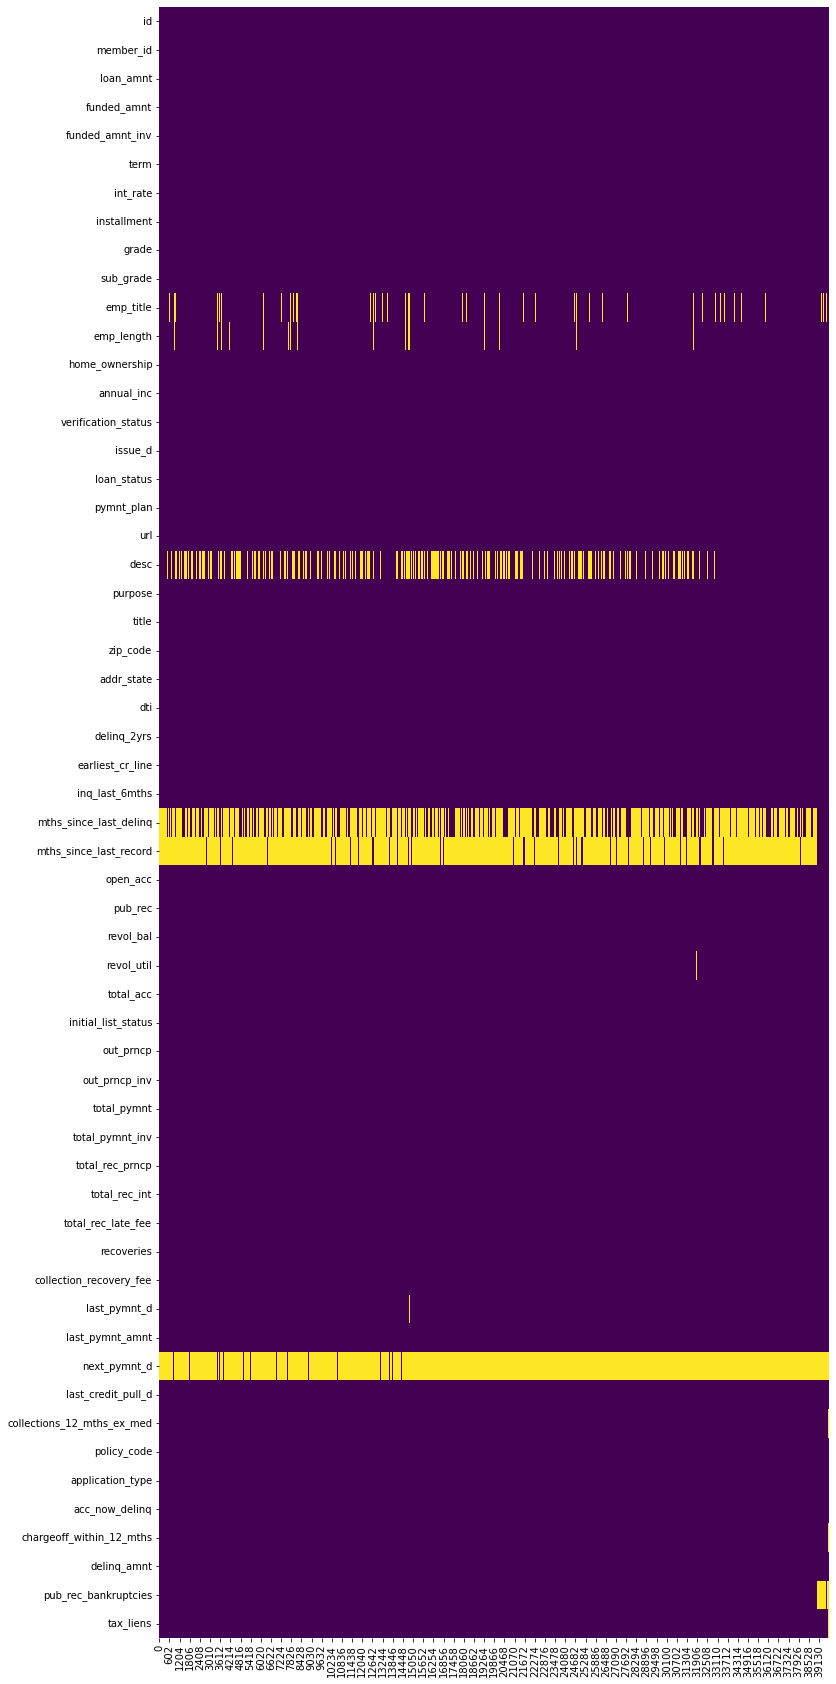

In [168]:
plt.figure(figsize=(12,30))
sns.heatmap(loan.isna().transpose(),
            cmap="viridis",cbar=False)
plt.show()

In [169]:
## finding % missing values by each column

pd.DataFrame(loan.isna().sum(),columns=['Values']).apply(lambda x:(x/len(loan))*100).sort_values(by='Values',ascending=False)

,Values
next_pymnt_d,97.129693
mths_since_last_record,92.985372
mths_since_last_delinq,64.662487
desc,32.580507
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998


### Top 4-5 rows here are the columns that have the highest number of missing values, need those to be cleaned up since they do not contribute to the analysis

In [170]:
loan.drop(labels=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc'],axis=1,inplace=True)

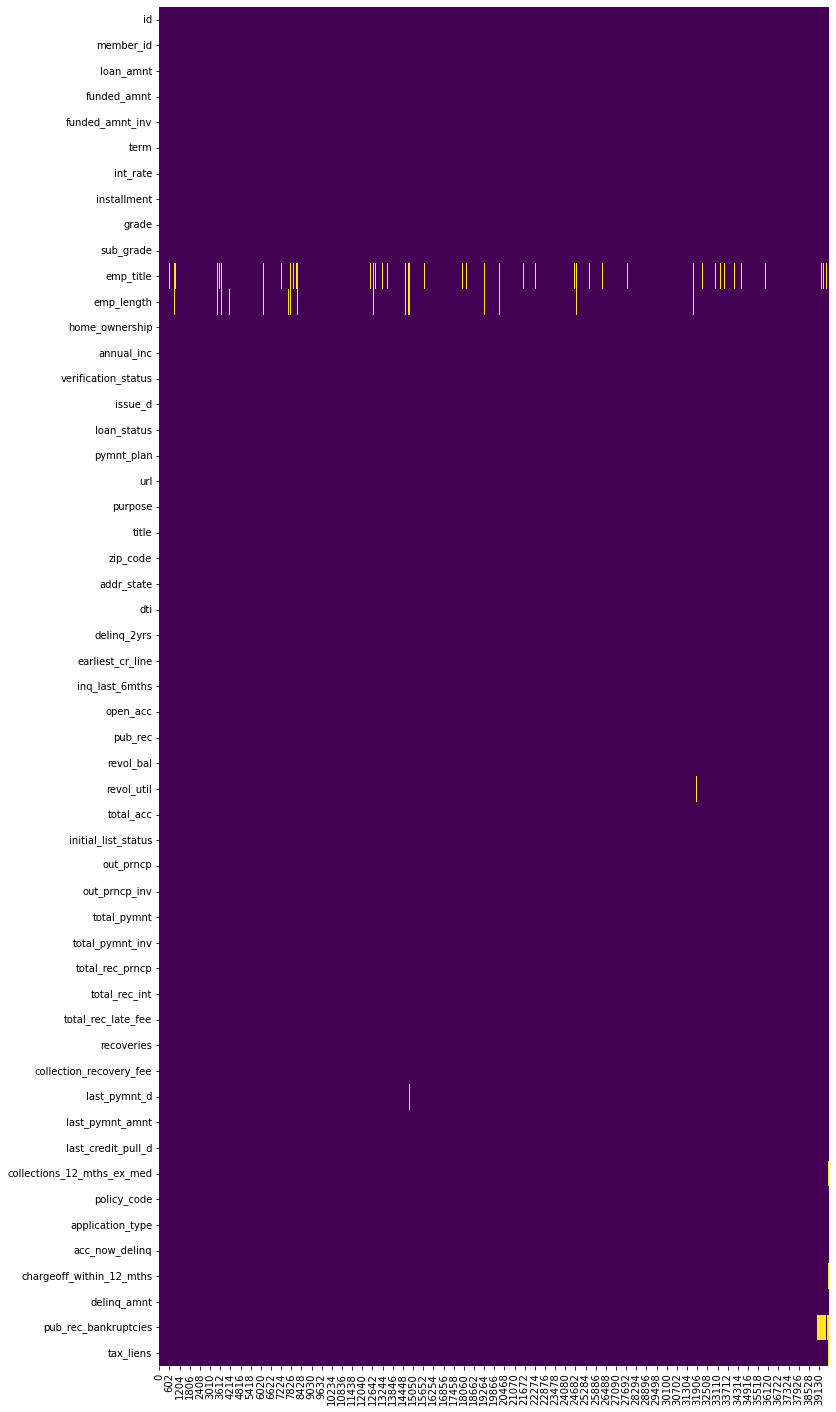

In [171]:
plt.figure(figsize=(12,25))
sns.heatmap(loan.isna().transpose(),
            cmap="viridis",cbar=False)
plt.show()

In [172]:
pd.DataFrame(loan.isna().sum(),columns=['Values']).sort_values(by='Values',ascending=False)

,Values
emp_title,2459
emp_length,1075
pub_rec_bankruptcies,697
last_pymnt_d,71
collections_12_mths_ex_med,56
chargeoff_within_12_mths,56
revol_util,50
tax_liens,39
title,11
last_credit_pull_d,2


In [173]:
## dropping irrelevant columns
loan = loan.drop(['id','member_id','emp_title','url','collections_12_mths_ex_med','policy_code','acc_now_delinq'
           ,'chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens'],axis=1)

#### We can drop rest of the missing values since they do not significantly impact the size of dataset to be analyzed

In [174]:
loan.dropna(subset=['emp_length','pub_rec_bankruptcies','last_pymnt_d','chargeoff_within_12_mths'
                    ,'collections_12_mths_ex_med','revol_util','tax_liens','title','last_credit_pull_d'],inplace=True)

# Variable data type study and conversion
    - Study the existing Data types.
    - Convert them appropriately.

In [178]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37823 entries, 0 to 39623
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   37823 non-null  int64  
 1   funded_amnt                 37823 non-null  int64  
 2   funded_amnt_inv             37823 non-null  float64
 3   term                        37823 non-null  object 
 4   int_rate                    37823 non-null  object 
 5   installment                 37823 non-null  float64
 6   grade                       37823 non-null  object 
 7   sub_grade                   37823 non-null  object 
 8   emp_length                  37823 non-null  object 
 9   home_ownership              37823 non-null  object 
 10  annual_inc                  37823 non-null  float64
 11  verification_status         37823 non-null  object 
 12  issue_d                     37823 non-null  object 
 13  loan_status                 378

In [180]:
loan.select_dtypes(include=['int64','float64'])

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,162.87,24000.00,27.65,0,1,3,0,...,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,59.83,30000.00,1.00,0,5,3,0,...,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,84.33,12252.00,8.72,0,2,2,0,...,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,339.31,49200.00,20.00,0,1,10,0,...,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,67.79,80000.00,17.94,0,0,15,0,...,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,12000,12000,725.0,381.66,100671.39,6.64,0,0,16,1,...,0.00,0.00,11202.55,0.0,1,0,0.0,0,1.0,0.0
39551,12375,12375,1000.0,404.62,80000.00,9.23,0,0,4,1,...,0.00,0.00,4259.11,0.0,1,0,0.0,0,1.0,0.0
39562,4800,4800,1100.0,155.52,35000.00,7.51,0,0,11,1,...,0.00,0.00,3891.08,0.0,1,0,0.0,0,1.0,0.0
39573,7000,7000,1000.0,227.82,63500.00,8.50,0,1,9,1,...,0.00,0.00,1571.29,0.0,1,0,0.0,0,1.0,0.0


In [181]:
## Converting number types: integer and float

loan['term'] = loan['term'].apply(lambda x:int(x[:3]))

loan['int_rate'] = loan['int_rate'].apply((lambda x:float(x[:-1])))

loan['revol_util'] = loan['revol_util'].apply((lambda x:float(x[:-1])))

In [184]:
loan.select_dtypes(include=['object'])

,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,May-16,INDIVIDUAL
1,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,May-16,INDIVIDUAL
3,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,Feb-96,f,Jan-15,Apr-16,INDIVIDUAL
4,B,B5,1 year,RENT,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,Jan-96,f,May-16,May-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,B,B2,6 years,MORTGAGE,Not Verified,Dec-07,Fully Paid,n,credit_card,Debt Consolidation,604xx,IL,Oct-79,f,May-08,Oct-15,INDIVIDUAL
39551,C,C3,2 years,RENT,Not Verified,Dec-07,Fully Paid,n,debt_consolidation,no credit cards for me,201xx,VA,Dec-00,f,Feb-10,May-14,INDIVIDUAL
39562,C,C1,1 year,RENT,Not Verified,Nov-07,Fully Paid,n,debt_consolidation,Want to pay off high intrest cards,226xx,VA,Mar-00,f,Aug-08,Aug-08,INDIVIDUAL
39573,C,C2,3 years,MORTGAGE,Not Verified,Nov-07,Fully Paid,n,debt_consolidation,Taking the First Step by Consolidating,853xx,AZ,Feb-89,f,May-10,Apr-16,INDIVIDUAL


In [185]:
## Converting date types from object type

loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']] = loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].apply(lambda x:'01-'+x)

loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']] = loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].apply(lambda x: pd.to_datetime(x,infer_datetime_format=True,errors='coerce'))

In [187]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37823 entries, 0 to 39623
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   37823 non-null  int64         
 1   funded_amnt                 37823 non-null  int64         
 2   funded_amnt_inv             37823 non-null  float64       
 3   term                        37823 non-null  int64         
 4   int_rate                    37823 non-null  float64       
 5   installment                 37823 non-null  float64       
 6   grade                       37823 non-null  object        
 7   sub_grade                   37823 non-null  object        
 8   emp_length                  37823 non-null  object        
 9   home_ownership              37823 non-null  object        
 10  annual_inc                  37823 non-null  float64       
 11  verification_status         37823 non-null  object    

#### Issuing support columns

In [191]:
loan['issue_yr'] = pd.DatetimeIndex(loan['issue_d']).year

In [197]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_yr,funded_perc
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,99.5
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,100.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,100.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,100.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,100.0


In [200]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_yr,funded_perc
count,37823.000000,37823.000000,37823.000000,37823.00000,37823.000000,37823.000000,3.782300e+04,37823.000000,37823.000000,37823.000000,...,37823.000000,37823.0,37823.0,37823.0,37823.0,37823.0,37823.000000,37823.0,37823.000000,37823.000000
mean,11328.891151,11050.996748,10619.465271,42.55728,12.070559,327.161001,6.967727e+04,13.377966,0.145811,0.866642,...,2731.019060,0.0,1.0,0.0,0.0,0.0,0.041456,0.0,2010.368744,94.898499
std,7477.323047,7205.152593,7113.100590,10.69485,3.734460,209.098263,6.365142e+04,6.655886,0.490534,1.066497,...,4490.079929,0.0,0.0,0.0,0.0,0.0,0.200272,0.0,0.810769,14.848588
min,500.000000,500.000000,0.000000,36.00000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,...,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2007.000000,0.000000
25%,5600.000000,5500.000000,5000.000000,36.00000,9.320000,168.750000,4.190200e+04,8.270000,0.000000,0.000000,...,224.810000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2010.000000,98.437500
50%,10000.000000,10000.000000,9200.000000,36.00000,11.860000,283.200000,6.000000e+04,13.470000,0.000000,1.000000,...,563.550000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2011.000000,99.955209
75%,15000.000000,15000.000000,14608.725420,60.00000,14.610000,434.750000,8.355000e+04,18.630000,0.000000,1.000000,...,3402.630000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,2011.000000,100.000000
max,35000.000000,35000.000000,35000.000000,60.00000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,2011.000000,100.000000


In [216]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36725 entries, 0 to 39623
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36725 non-null  int64         
 1   funded_amnt              36725 non-null  int64         
 2   funded_amnt_inv          36725 non-null  float64       
 3   term                     36725 non-null  int64         
 4   int_rate                 36725 non-null  float64       
 5   installment              36725 non-null  float64       
 6   grade                    36725 non-null  object        
 7   sub_grade                36725 non-null  object        
 8   emp_length               36725 non-null  object        
 9   home_ownership           36725 non-null  object        
 10  annual_inc               36725 non-null  float64       
 11  verification_status      36725 non-null  object        
 12  issue_d                  36725 n

In [218]:
loan['issue_yr'] = loan['issue_yr'].apply(str)

### Relevancy check on the target variable

## We can drop the status = 'current' since that does not impact our analysis

In [209]:
loan = loan[loan['loan_status']!='Current']

/Users/absinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

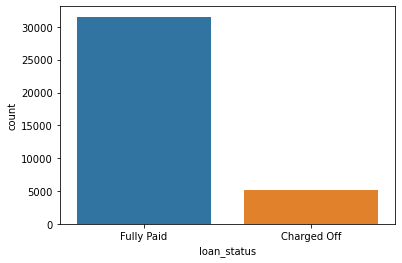

In [219]:
sns.countplot(loan['loan_status'])

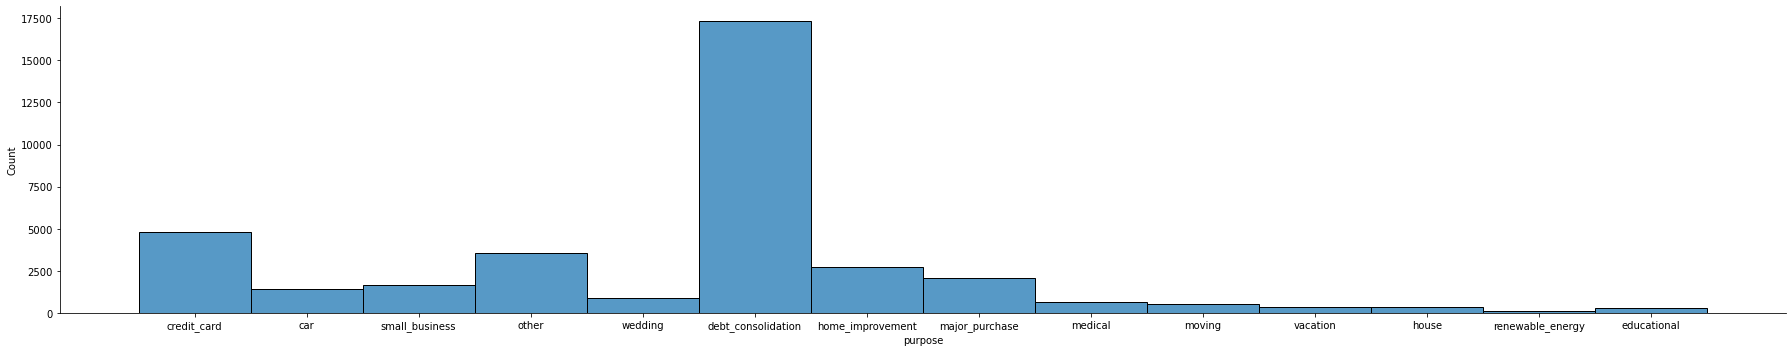

In [220]:
sns.displot(x=loan['purpose'],aspect=5)

Most of the purpose encapsulates 'debt consolidation'

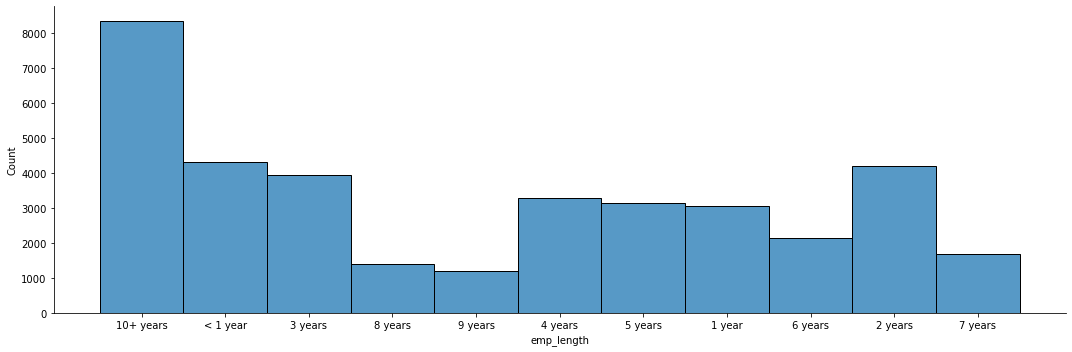

In [221]:
sns.displot(loan['emp_length'],aspect=3)

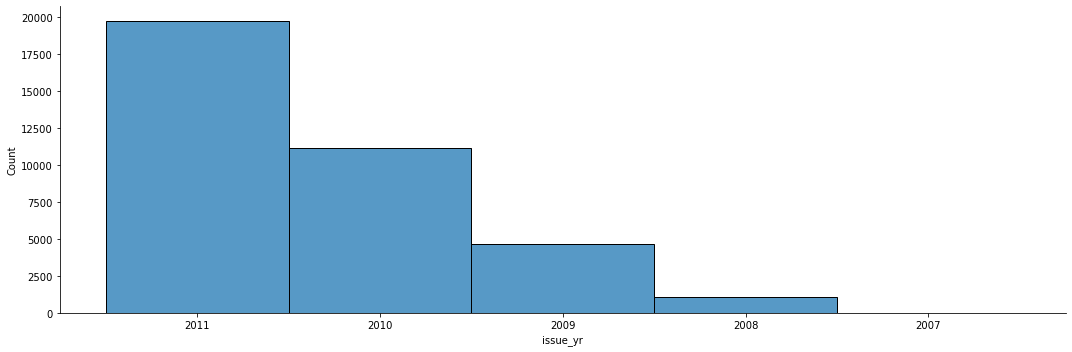

In [222]:
sns.displot(loan['issue_yr'],aspect=3)

In [233]:
loan['issue_yr'].value_counts()/len(loan)*100

2011    53.802587
2010    30.415248
2009    12.762423
2008     3.006127
2007     0.013615
Name: issue_yr, dtype: float64

~~ 53% of all loans were sanctioned just in 2011

In [240]:
loan[['issue_yr','loan_status']].groupby(by='issue_yr')['loan_status'].count()

issue_yr
2007        5
2008     1104
2009     4687
2010    11170
2011    19759
Name: loan_status, dtype: int64

In [251]:
loan_pivot = loan[['issue_yr','loan_status']].pivot_table(index='issue_yr',columns='loan_status',aggfunc=len)
loan_pivot.apply(lambda x: 100*x/float(x.sum()), axis=1)

loan_status,Charged Off,Fully Paid
issue_yr,,
2007,20.000000,80.000000
2008,15.307971,84.692029
2009,12.353318,87.646682
2010,12.426141,87.573859
2011,15.506858,84.493142
